In [1]:
## Create car-assignment dict
import numpy as np
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import fiona
import io

car_df = pd.read_csv('./files/car-assignments.csv')
# print(car_data
cred_df = pd.read_csv('./files/cc_data.csv')
# print(card_data)
loy_df = pd.read_csv('./files/loyalty_data.csv')
# print(loy_data)
gps_df = pd.read_csv('./files/gps.csv')
print(gps_df)

print('Car assignment data: \n', car_df.head(1), '\n')
print('Credit card data: \n', cred_df.head(1), '\n')
print('Loyalty card data: \n', loy_df.head(1), '\n')
print('Car GPS data: \n', gps_df.head(1))

                  Timestamp  id        lat       long
0       01/06/2014 06:28:01  35  36.076225  24.874689
1       01/06/2014 06:28:01  35  36.076220  24.874596
2       01/06/2014 06:28:03  35  36.076211  24.874443
3       01/06/2014 06:28:05  35  36.076217  24.874253
4       01/06/2014 06:28:06  35  36.076214  24.874167
...                     ...  ..        ...        ...
685164  01/19/2014 20:56:43  30  36.058110  24.902130
685165  01/19/2014 20:56:47  30  36.058258  24.901774
685166  01/19/2014 20:56:48  30  36.058296  24.901711
685167  01/19/2014 20:56:49  30  36.058304  24.901620
685168  01/19/2014 20:56:55  30  36.058490  24.901095

[685169 rows x 4 columns]
Car assignment data: 
   LastName FirstName  CarID   CurrentEmploymentType CurrentEmploymentTitle
0  Alcazar     Lucas    1.0  Information Technology            IT Helpdesk 

Credit card data: 
        timestamp             location  price FirstName LastName
0  1/6/2014 7:28  Brew've Been Served  11.34    Edvard     Vann 



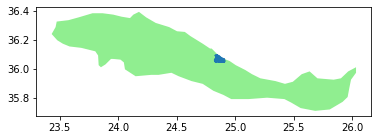

Island geo data: 
      Name                                           geometry
0  Kronos  POLYGON ((24.88970 36.07290, 24.95190 36.05380... 

City geo data: 
         TLID FEDIRP    FENAME FETYPE FEDIRS  FRADDL  TOADDL  FRADDR  TOADDR  \
0  184632270      N  Hallanol     Dr   None     NaN     NaN     NaN     NaN   

                                            geometry  
0  LINESTRING (24.84149 36.07051, 24.84156 36.07042)   



In [2]:
island_shape = gpd.read_file('./files/geospatial/kronos_island.shp')

# Data cleaning
src = fiona.open('./files/geospatial/abila.shp')
meta = src.meta
meta['driver'] = 'GeoJSON'
with io.BytesIO() as buffer:
    with fiona.open(buffer, 'w', **meta) as dst:
        for i, feature in enumerate(src):
            
            try:
                if len(feature['geometry']['coordinates']) > 1:
                    dst.write(feature)
            except:
                print('Error: ', i)
    
    buffer.seek(0)
    city_shape = gpd.read_file(buffer, driver='GeoJSON')
    
# Plot the city shape on the island shape
island_map, ax = plt.subplots()
ax.set_aspect('equal')

island_shape.plot(ax=ax, color='lightgreen')
city_shape.plot(ax=ax)

plt.show()

print('Island geo data: \n', island_shape.head(1), '\n')
print('City geo data: \n', city_shape.head(1), '\n')

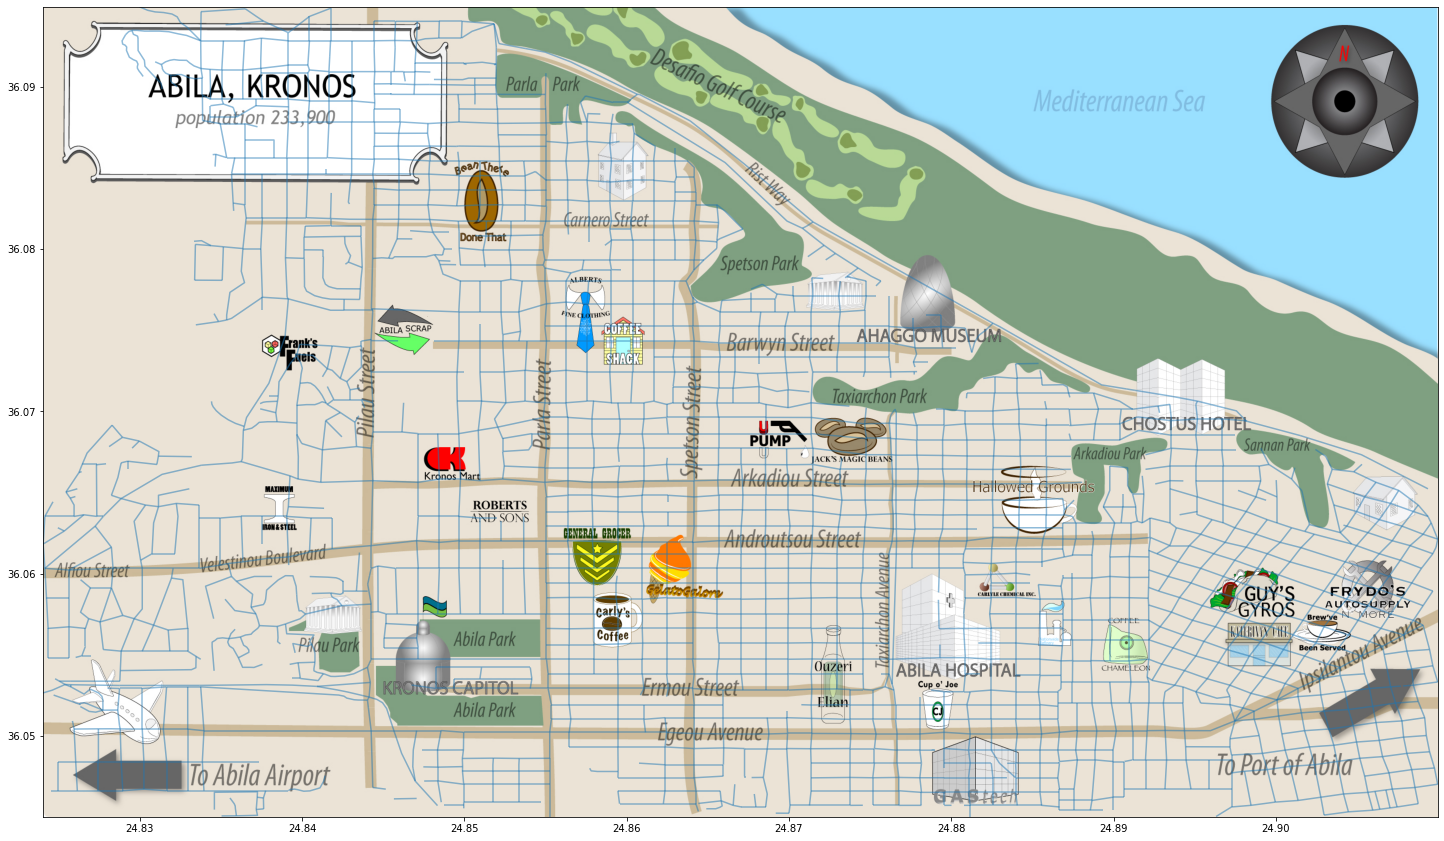

In [3]:
from shapely.geometry import LineString, shape

# Plot the city shape on the city tourist map
img_map = plt.imread('./files/MC2-tourist.jpg')

min_x = min_y = 1e100
max_x = max_y = 0
for item in city_shape.geometry.iloc:
    coords = list(item.coords)
    for c in coords:
        if c[0] < min_x:
            min_x = c[0]
        if c[0] > max_x:
            max_x = c[0]
        if c[1] < min_y:
            min_y = c[1]
        if c[1] > max_y:
            max_y = c[1]

# print(min_x, max_x, min_y, max_y)

city_map, ax = plt.subplots(figsize=[25, 25])
ax.set_aspect('equal')
ax.scatter([1,2], [3,4])
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])

city_shape.plot(ax=ax, alpha=0.5)
ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])

plt.show()

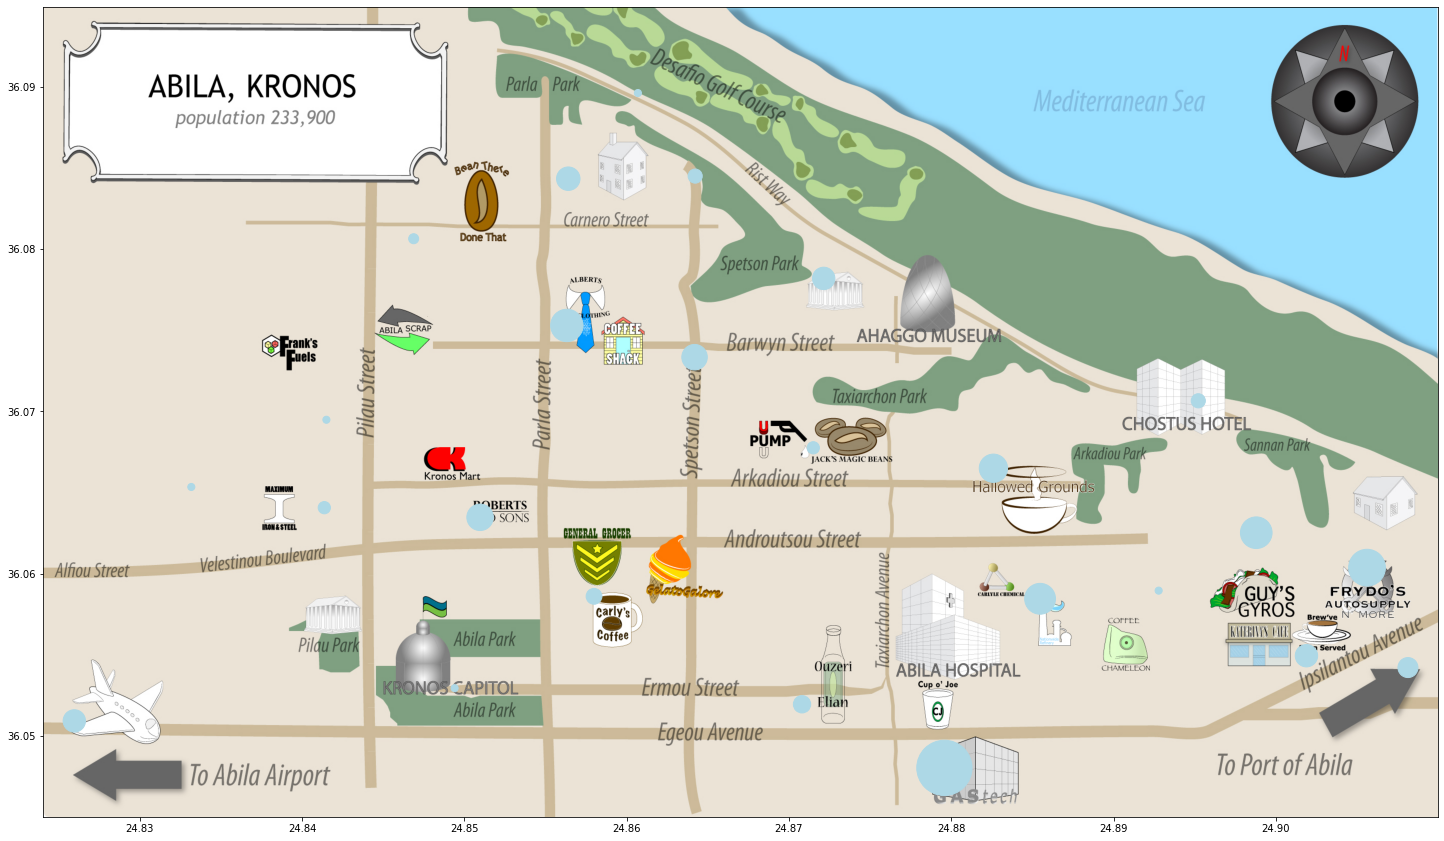

In [4]:
common_stops, ax = plt.subplots(figsize=[25, 25])
data = pd.read_json('stops_all_data.txt', lines=True)
gdf_cs = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['long'], data['lat']))

ax.set_aspect('equal')
ax.scatter([1,2], [3,4])
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])

gdf_cs.plot(ax=ax, markersize=data['count']*50, color='lightblue')
ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])
plt.show()

In [13]:
def draw_car_paths(ids):
#     print(ids)
    n = len(ids)
    color = iter(plt.cm.rainbow(np.linspace(0,1,n)))
    

    for _id in ids:
        
        
        data = gps_df[gps_df['id'] == _id]
        print(data)
        
        car_path, ax = plt.subplots(figsize=[25, 25])
        ax.set_aspect('equal')
        ax.scatter([1,2], [3,4])
        ax.set_xlim([min_x, max_x])
        ax.set_ylim([min_y, max_y])

        city_shape.plot(ax=ax, alpha=0.5)
        ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])

        plt.plot(data['long'], data['lat'], color=next(color))

        plt.show()
        
    car_path, ax = plt.subplots(figsize=[25, 25])
    ax.set_aspect('equal')
    ax.scatter([1,2], [3,4])
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])

    city_shape.plot(ax=ax, alpha=0.5)
    ax.imshow(img_map, extent=[min_x, max_x, min_y, max_y])

#     plt.plot(gps_df['long'], gps_df['lat'])

    plt.show()

In [6]:
# import json

# stops = []
# stops_gps_df = pd.DataFrame()

# time_tresh = pd.Timedelta('0 days 00:03:00')
# dist_thresh = 0.001


# ids = np.unique(gps_df['id'])
# nStops = 0
# nEvents = 0
# for _id in ids:
    
#     id_data = gps_df[gps_df['id'] == _id]
#     old_ts = None
#     for i, ts in enumerate(id_data['Timestamp']):
#         if old_ts == None:
#             old_ts = pd.Timestamp(ts)
#             id_data.loc[id_data.index[i], 'stop'] = False
#         else:
#             ts = pd.Timestamp(ts)
#             if (ts-old_ts > time_tresh):
#                 id_data.loc[id_data.index[i], 'stop'] = True
                
#                 new_stop = True
#                 for s in stops:
#                     if len(s) > 0 and \
#                     id_data.loc[id_data.index[i], 'long'] > s['long']-dist_thresh and \
#                     id_data.loc[id_data.index[i], 'long'] < s['long']+dist_thresh and \
#                     id_data.loc[id_data.index[i], 'lat'] > s['lat']-dist_thresh and \
#                     id_data.loc[id_data.index[i], 'lat'] < s['lat']+dist_thresh:
#                         s['count'] += 1
#                         s['long'] = (id_data.loc[id_data.index[i], 'long'] + s['long']) / 2
#                         s['lat'] = (id_data.loc[id_data.index[i], 'lat'] + s['lat']) / 2
#                         new_stop = False
                        
#                         stops_gps_df.loc[nEvents, 'stop_id'] = s['id']
#                         stops_gps_df.loc[nEvents, 'car_id'] = _id
#                         stops_gps_df.loc[nEvents, 'timestamp'] = ts
                        
#                         break

#                 if new_stop:
#                     stops.append({'id': nStops,'long': id_data.loc[id_data.index[i], 'long'],
#                           'lat': id_data.loc[id_data.index[i], 'lat'],
#                           'count': 1
#                          })
                    
#                     stops_gps_df.loc[nEvents, 'stop_id'] = nStops
#                     stops_gps_df.loc[nEvents, 'car_id'] = _id
#                     stops_gps_df.loc[nEvents, 'timestamp'] = ts

#                     nStops += 1
            
#                 nEvents += 1
#             else:
#                 id_data.loc[id_data.index[i], 'stop'] = False
#             old_ts = ts
#     print('ID ', _id)

# # stop_file = open("stops_3min_0.001thresh.txt", "w")
# # for txt in stops:
# #     stop_file.write(json.dumps(txt))
# #     stop_file.write('\n')
# # stop_file.close()

# stops_gps_df.to_csv('stops_timestamps_3min_0.001thresh.csv')

# print(stops)
# print(gps_df)
# print(stops_gps_df)

c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  1


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  2


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  3


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  4


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  5


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  6


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  7


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  8


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  9


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  10


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  11


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  12


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  13


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  14


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  15


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  16


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  17


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  18


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  19


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  20


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  21


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  22


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  23


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  24


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  25


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  26


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  27


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  28


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  29


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  30


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  31


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  32


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  33


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  34


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  35


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  101


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  104


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  105


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  106


c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\users\måns\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


ID  107
[{'id': 0, 'long': 24.885878270896587, 'lat': 36.063700733605046, 'count': 71}, {'id': 1, 'long': 24.87957118229764, 'lat': 36.04803861938129, 'count': 755}, {'id': 2, 'long': 24.85760052171417, 'lat': 36.07664893469121, 'count': 163}, {'id': 3, 'long': 24.882603697058855, 'lat': 36.06644726459409, 'count': 35}, {'id': 4, 'long': 24.85629952887928, 'lat': 36.07523735808232, 'count': 21}, {'id': 5, 'long': 24.858027155975037, 'lat': 36.0597584426653, 'count': 48}, {'id': 6, 'long': 24.870806933617352, 'lat': 36.0519488756204, 'count': 70}, {'id': 7, 'long': 24.85097533084706, 'lat': 36.063437755285264, 'count': 69}, {'id': 8, 'long': 24.86042692462, 'lat': 36.085468832178705, 'count': 37}, {'id': 9, 'long': 24.868603478996505, 'lat': 36.052825403987356, 'count': 19}, {'id': 10, 'long': 24.85237580193533, 'lat': 36.06583388157482, 'count': 48}, {'id': 11, 'long': 24.90211450477441, 'lat': 36.055349255372946, 'count': 182}, {'id': 12, 'long': 24.849802451835938, 'lat': 36.06583546

In [7]:
stops_df = pd.DataFrame.from_dict(stops)
print(stops_gps_df)
print(stops_df)    

      stop_id  car_id           timestamp
0         0.0     1.0 2014-01-06 07:57:01
1         1.0     1.0 2014-01-06 12:17:01
2         2.0     1.0 2014-01-06 13:25:01
3         1.0     1.0 2014-01-06 17:44:01
4         3.0     1.0 2014-01-06 19:36:01
...       ...     ...                 ...
3132     86.0   107.0 2014-01-17 11:03:01
3133     86.0   107.0 2014-01-17 11:34:57
3134      1.0   107.0 2014-01-17 11:53:01
3135     87.0   107.0 2014-01-17 13:17:01
3136     87.0   107.0 2014-01-17 17:12:01

[3137 rows x 3 columns]
    id       long        lat  count
0    0  24.885878  36.063701     71
1    1  24.879571  36.048039    755
2    2  24.857601  36.076649    163
3    3  24.882604  36.066447     35
4    4  24.856300  36.075237     21
..  ..        ...        ...    ...
84  84  24.841434  36.064085      9
85  85  24.880911  36.058561     35
86  86  24.908095  36.054134     36
87  87  24.885517  36.058420     46
88  88  24.845942  36.074408      5

[89 rows x 4 columns]


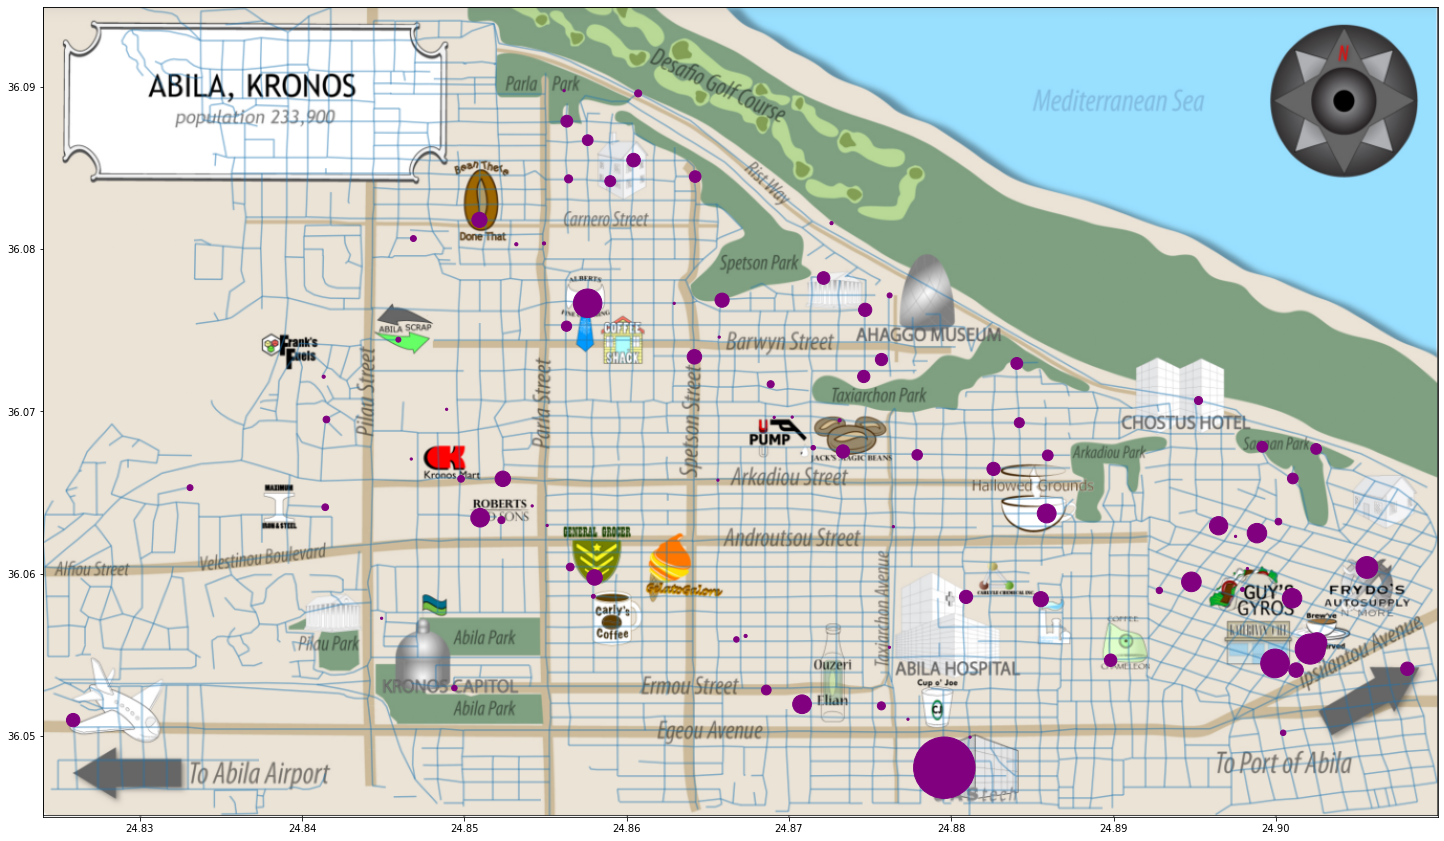

In [8]:
city_map_img = plt.imread('./files/city_map.png')

common_stops, ax = plt.subplots(figsize=[25, 25])
gdf_cs = gpd.GeoDataFrame(stops_df, geometry=gpd.points_from_xy(stops_df['long'], stops_df['lat']))

ax.set_aspect('equal')
ax.scatter([1,2], [3,4])
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])

gdf_cs.plot(ax=ax, markersize=stops_df['count']*5, color='purple')
ax.imshow(city_map_img, extent=[min_x, max_x, min_y, max_y])
plt.show()

                  Timestamp  id        lat       long
2501    01/06/2014 07:20:01   1  36.066457  24.882582
2509    01/06/2014 07:20:03   1  36.066344  24.882589
2516    01/06/2014 07:20:06   1  36.066147  24.882584
2519    01/06/2014 07:20:07   1  36.066130  24.882576
2527    01/06/2014 07:20:10   1  36.065955  24.882615
...                     ...  ..        ...        ...
683375  01/19/2014 19:56:44   1  36.066462  24.882061
683377  01/19/2014 19:56:45   1  36.066476  24.882168
683378  01/19/2014 19:56:47   1  36.066483  24.882272
683381  01/19/2014 19:56:49   1  36.066471  24.882475
683382  01/19/2014 19:56:50   1  36.066458  24.882534

[19311 rows x 4 columns]


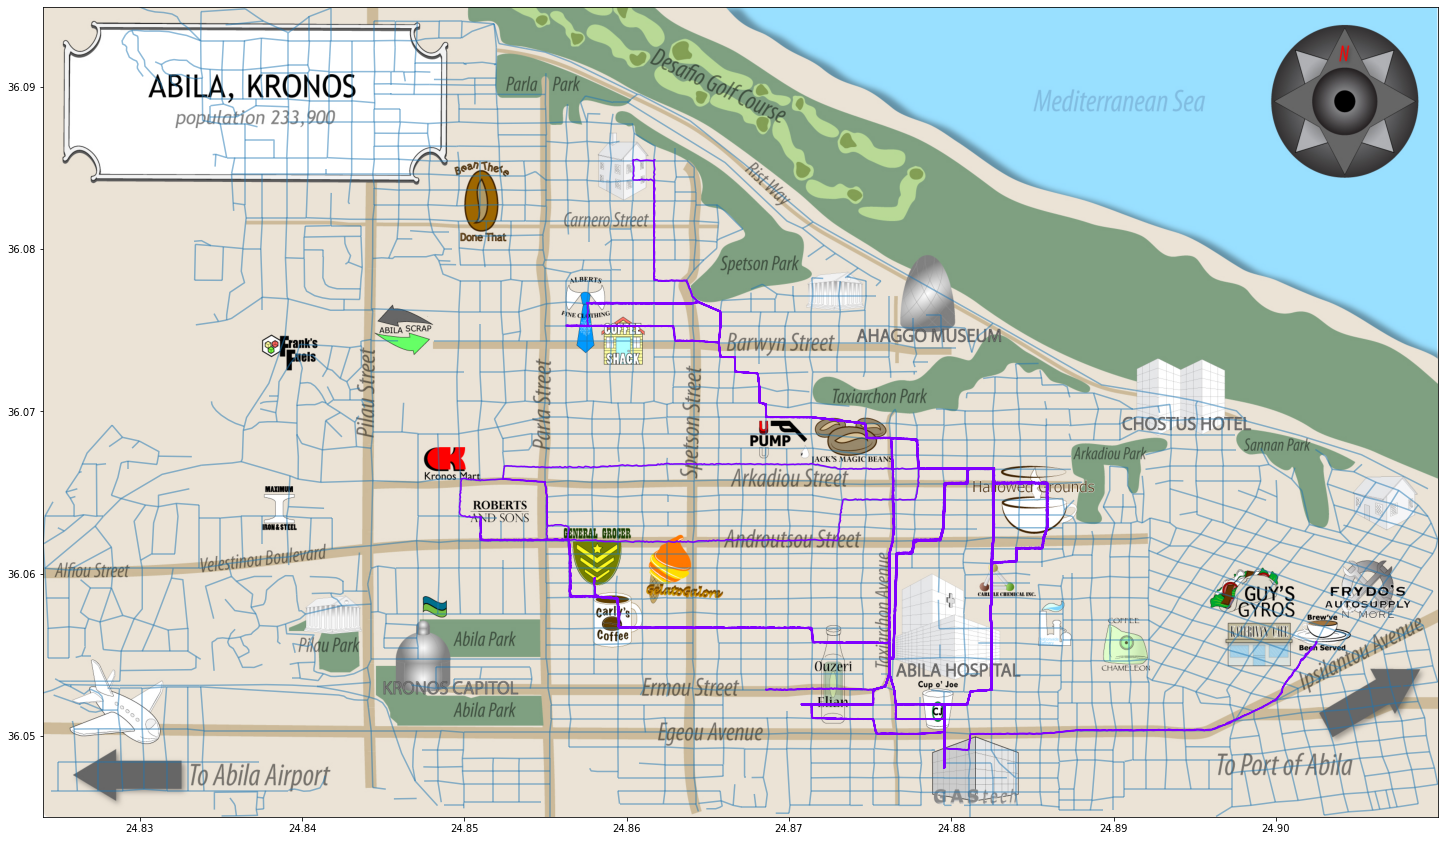

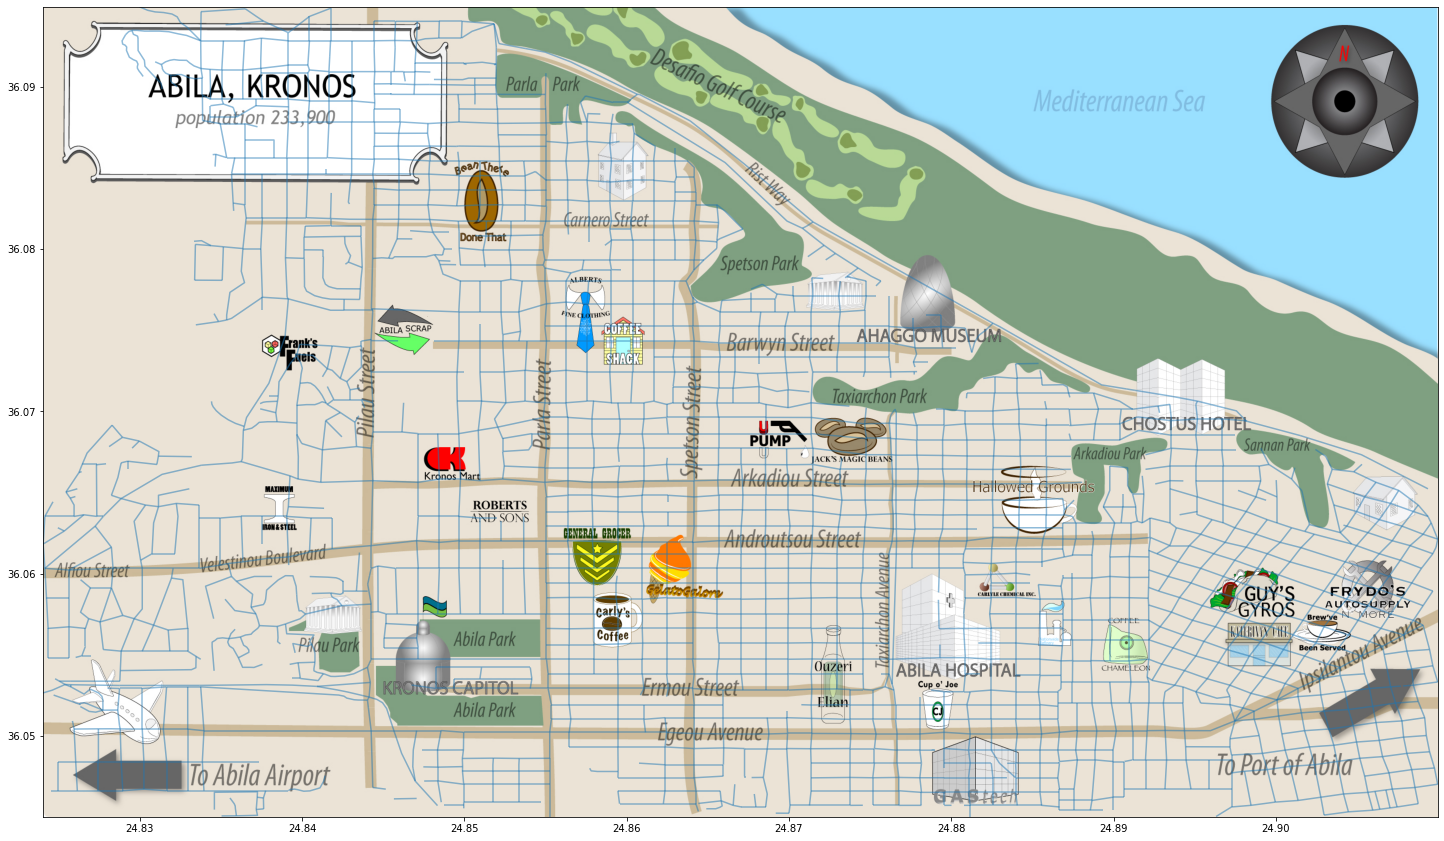

In [14]:
draw_car_paths([1])